In [1]:
import pandas as pd
import numpy as np
from collections import OrderedDict
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import datetime, timedelta

C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
import os, sys
sys.path.append(os.getcwd())

In [3]:
from _element import feature_control as ft_c
from _element import varr
from _element import calculations as calc
from _element.result_control import Result

from _alg.prophet import Prophet_timeseries
from _alg.arima import Arima_timeseries

from _evaluation.cross_validation import Cross_Validation
from _evaluation import compare

In [4]:
INPUT_FILENAME= 'KPP일별투입(10_17)_withallobj.xlsx'

In [5]:
df_raw= ft_c.xlsx_opener(varr.PJ_DIR+varr.DF_DIR, INPUT_FILENAME)
df_temp= ft_c.xlsx_opener(varr.PJ_DIR+varr.TEMP_DATA_DIR, 'temp_data_merged.xlsx')

In [6]:
y_col= df_raw['raw'].columns.values.tolist()

In [7]:
try:
    y_col.remove('ds')
except ValueError:
    pass

In [8]:
x_col= df_temp['raw'].columns.values.tolist()

In [9]:
df_raw['raw']['ds']= pd.to_datetime(df_raw['raw']['ds'], box=True, format= '%Y/%m/%d', exact=True)
df_temp['raw']['ds']= pd.to_datetime(df_temp['raw']['ds'], box=True, format= '%Y/%m/%d', exact=True)
df_raw['raw']= pd.merge(df_raw['raw'], df_temp['raw'], how='inner', on='ds')

In [10]:
ft_c.divide_multiple_y(df_raw, 'raw', y_col, x_col)

In [11]:
df_raw

{227645:              ds   temp_max   temp_min  rain_amount     y
 0    2010-07-01  30.500000  24.900000          0.0   512
 1    2010-07-02  25.799999  22.700001         70.0   992
 2    2010-07-03  25.600000  22.600000          1.0   512
 3    2010-07-04  29.700001  23.100000          0.0     0
 4    2010-07-05  30.600000  21.799999          0.0  1204
 5    2010-07-06  31.000000  22.400000          0.0  1024
 6    2010-07-07  29.600000  21.900000          0.0  1792
 7    2010-07-08  29.000000  21.299999          0.0  2032
 8    2010-07-09  29.299999  21.799999          0.0  1456
 9    2010-07-10  29.100000  22.900000          0.0   512
 10   2010-07-11  25.900000  21.000000          0.0     0
 11   2010-07-12  28.299999  22.200001          0.0  1472
 12   2010-07-13  31.299999  21.900000          0.0  1408
 13   2010-07-14  27.500000  22.700001          1.0  1168
 14   2010-07-15  29.799999  24.299999          0.0   512
 15   2010-07-16  27.100000  21.700001         52.0   448
 16   

In [12]:
# arima= Arima_timeseries()

lag 0: corr 1.0
lag 7: corr 0.6283476618636424
lag 357: corr 0.5874529933794431
lag 364: corr 0.5806461038936168
lag 14: corr 0.5750943668282587
lag 350: corr 0.5339669096996941
lag 21: corr 0.51972968660716
lag 28: corr 0.5037868894602766
lag 343: corr 0.4883535348416609
lag 1: corr 0.46198505276768603
lag 336: corr 0.45359684435039505
lag 35: corr 0.45331565112134087
lag 329: corr 0.43061808794185136
lag 42: corr 0.4164298765570115
lag 322: corr 0.4024076260562392
lag 49: corr 0.38618686133125746
lag 358: corr 0.3850362483264199
lag 8: corr 0.3799994652384224
lag 6: corr 0.3785548176626038
lag 56: corr 0.36856118846358915
lag 3: corr 0.36311340578004453
lag 315: corr 0.3620816480231004
lag 13: corr 0.35969532751500566
lag 356: corr 0.35059140112225606
lag 4: corr 0.34442799522177353
lag 363: corr 0.34285604861777585
lag 2: corr 0.3420816589402483
lag 15: corr 0.3391913342549458
lag 308: corr 0.3337715264310909
lag 351: corr 0.3304935533865053
lag 63: corr 0.31826156739715755
lag 10: 

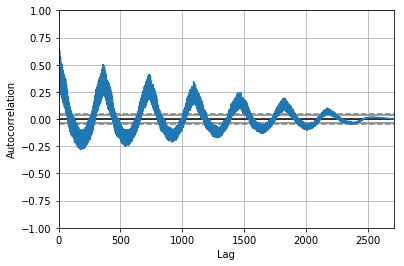

In [13]:
# arima.corr_check(df_raw[230054]['y'])

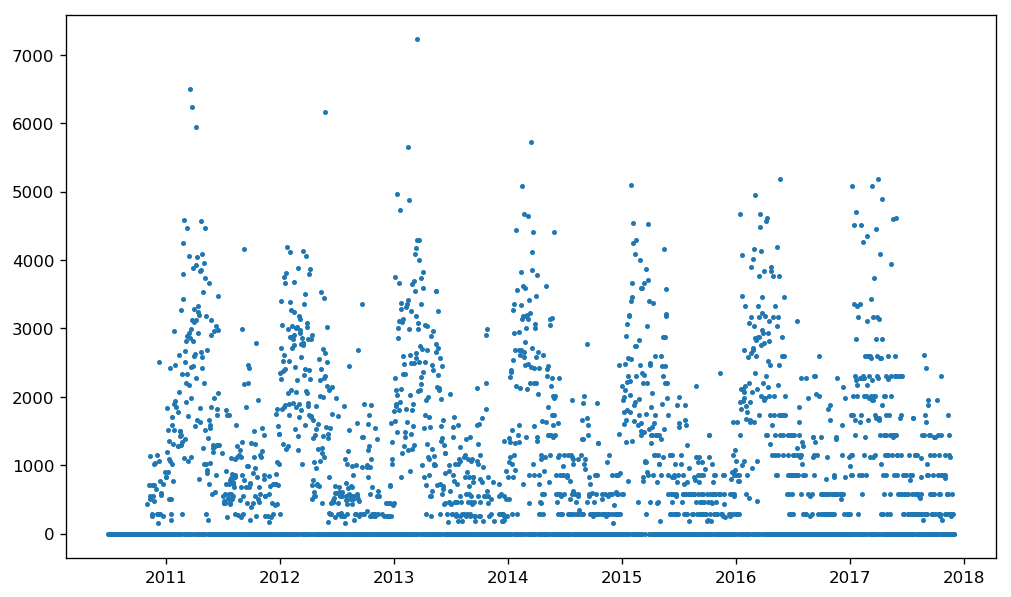

In [14]:
# arima.plot(df_raw[230054]['ds'], df_raw[230054]['y'])

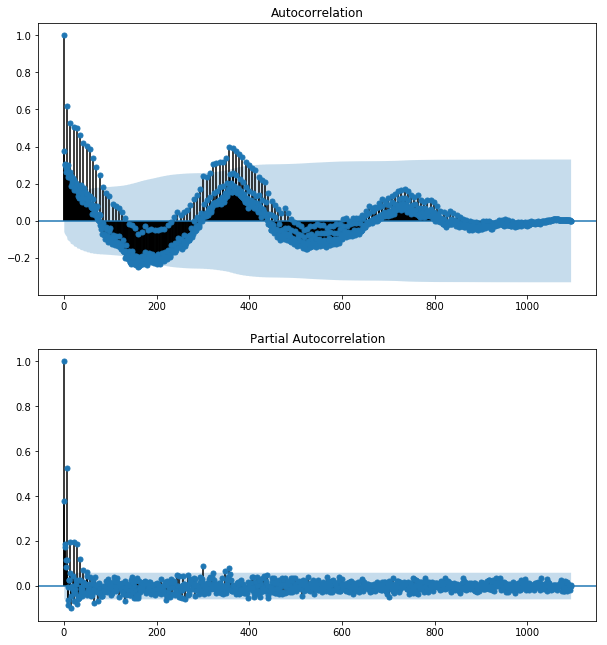

In [15]:
# arima.acf_plot(df_raw[230054]['y'])

In [16]:
# df_raw[230054]['y'].tail(15)

2695     288
2696     288
2697    1120
2698       0
2699     288
2700     252
2701       0
2702       0
2703     576
2704     288
2705       0
2706       0
2707     288
2708       0
2709       0
Name: y, dtype: int64

In [17]:
# df_diff= arima.diff(df_raw[230054]['y'], 7, '7days_diff')

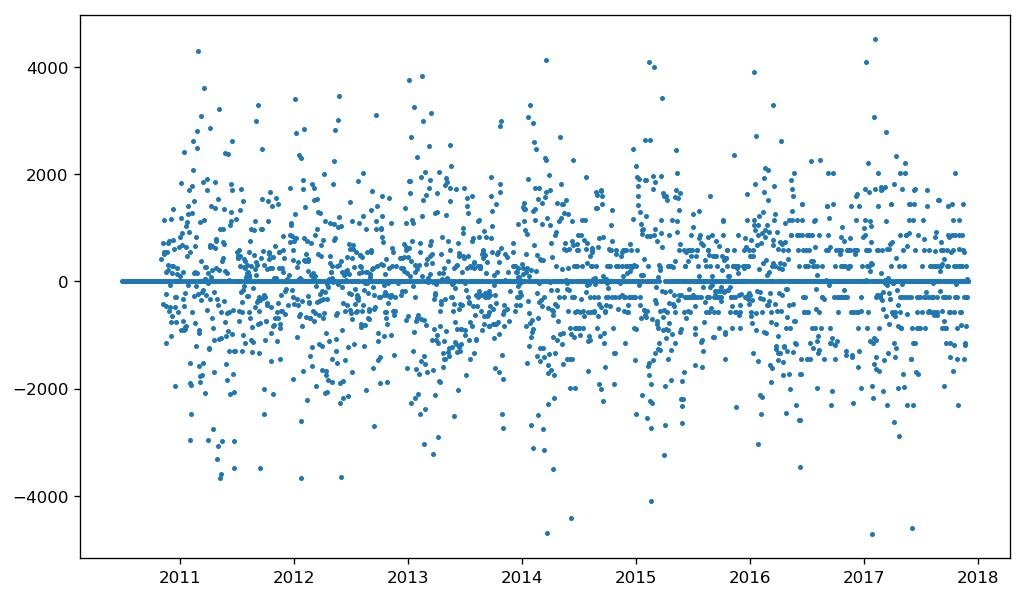

In [18]:
# arima.plot(df_raw[230054]['ds'], df_diff)

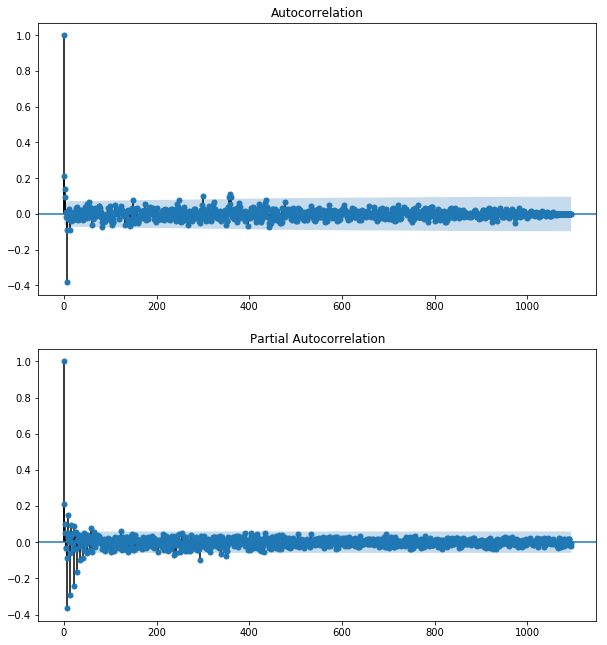

In [19]:
# arima.acf_plot(df_diff)

lag 0: corr 1.0
lag 1: corr 0.2205858358029559
lag 2: corr 0.13510434780429506
lag 3: corr 0.08498603944458608
lag 357: corr 0.0756178372853095
lag 247: corr 0.0734226215792238
lag 355: corr 0.07230848594677429
lag 356: corr 0.06510574426724232
lag 283: corr 0.060060648833729954
lag 249: corr 0.05627609624912949
lag 301: corr 0.052340532191297945
lag 40: corr 0.05182973462394174
lag 68: corr 0.05137638327171076
lag 358: corr 0.04927678536565745
lag 54: corr 0.048443343611181945
lag 28: corr 0.046556377169360424
lag 244: corr 0.044987968119225875
lag 148: corr 0.04487215944412196
lag 298: corr 0.04419954985162939
lag 136: corr 0.0439762649097348
lag 192: corr 0.042790727101520744
lag 56: corr 0.04252666137214622
lag 45: corr 0.04168113700811448
lag 304: corr 0.041259538936372395
lag 51: corr 0.041007580127134735
lag 359: corr 0.04010552645582529
lag 163: corr 0.03820527687424001
lag 248: corr 0.03793839324191034
lag 360: corr 0.035651072950157806
lag 12: corr 0.035081584876312105
lag 32

lag 101: corr -0.022750675333788977
lag 19: corr -0.023903420481449087
lag 271: corr -0.02399118430564803
lag 198: corr -0.02414568248154374
lag 206: corr -0.0245497898540841
lag 143: corr -0.024679649707265626
lag 264: corr -0.024889895873121
lag 151: corr -0.026191511395731504
lag 169: corr -0.026259405419223426
lag 275: corr -0.02629877937085089
lag 223: corr -0.02679136040420925
lag 88: corr -0.02719749440470154
lag 340: corr -0.027498963990446476
lag 320: corr -0.027708279688123817
lag 195: corr -0.02814278640871178
lag 182: corr -0.02837952541534341
lag 5: corr -0.02840165907202012
lag 338: corr -0.029150358740769586
lag 38: corr -0.029609166299892645
lag 330: corr -0.029852990385364868
lag 287: corr -0.02999412741598083
lag 318: corr -0.030181879805275435
lag 104: corr -0.030657418164093894
lag 211: corr -0.03075634770913332
lag 228: corr -0.03084856693823244
lag 23: corr -0.030927393436487382
lag 93: corr -0.03143525053669734
lag 180: corr -0.031436756201960535
lag 103: corr -0

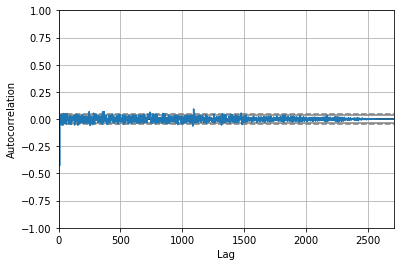

In [20]:
# arima.corr_check(df_diff)

In [52]:
# arima._model

{'7days_diff': {'periods': 7, 'prior_series': 0          0
  1          0
  2          0
  3          0
  4          0
  5          0
  6          0
  7          0
  8          0
  9          0
  10         0
  11         0
  12         0
  13         0
  14         0
  15         0
  16         0
  17         0
  18         0
  19         0
  20         0
  21         0
  22         0
  23         0
  24         0
  25         0
  26         0
  27         0
  28         0
  29         0
          ... 
  2680    1152
  2681     288
  2682     864
  2683     288
  2684       0
  2685     288
  2686       0
  2687     576
  2688     576
  2689    1728
  2690     576
  2691       0
  2692     288
  2693    1440
  2694    1152
  2695     288
  2696     288
  2697    1120
  2698       0
  2699     288
  2700     252
  2701       0
  2702       0
  2703     576
  2704     288
  2705       0
  2706       0
  2707     288
  2708       0
  2709       0
  Name: y, Length: 2710, dtype: int64}}

In [53]:
# df_raw[230054]['y']= df_diff

In [54]:
# r= Result()

In [55]:
cv= Cross_Validation(df_raw)

In [56]:
cv.slice('y', x_col)

In [57]:
cv._data

{'230054_0': {'test':              ds  temp_max  temp_min  rain_amount      y
  2703 2017-11-24       2.9      -2.5          0.1  288.0
  2704 2017-11-25       6.4       0.8         15.7 -832.0
  2705 2017-11-26       6.4      -2.4          0.0    0.0
  2706 2017-11-27       8.1       1.8          0.0 -288.0
  2707 2017-11-28       9.8       4.2          1.2   36.0
  2708 2017-11-29       5.7      -3.2          0.0    0.0
  2709 2017-11-30       1.8      -7.1          0.0    0.0,
  'testX':              ds  temp_max  temp_min  rain_amount
  2703 2017-11-24       2.9      -2.5          0.1
  2704 2017-11-25       6.4       0.8         15.7
  2705 2017-11-26       6.4      -2.4          0.0
  2706 2017-11-27       8.1       1.8          0.0
  2707 2017-11-28       9.8       4.2          1.2
  2708 2017-11-29       5.7      -3.2          0.0
  2709 2017-11-30       1.8      -7.1          0.0,
  'testY': 2703    288.0
  2704   -832.0
  2705      0.0
  2706   -288.0
  2707     36.0
  2708  

In [62]:
prpt_withobj= Prophet_timeseries(cv= True)

In [63]:
prpt_withobj.add_model('obj', 'day', regressor= None)

In [64]:
prpt_withobj.fit('obj', txs_traintest= cv._data)

In [65]:
prpt_withobj.forecast('obj', forecast_dict= r.forecast_dict)

C:\Studying\Project_Nextop\nextop-engine\nextop_engine\_alg\prophet.py:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  result_forecast['ds'], box=True, format= '%Y/%m/%d', exact=True


In [ ]:
r.forecast_dict

In [80]:
r.err_rate()
r.print_err_rate()

RMSE with segment companycode_diff230054_230054_0: 333.1690
MAPE with segment companycode_diff230054_230054_0: inf
MAPE_with_std with segment companycode_diff230054_230054_0: 74.6298
MAPE_div_std with segment companycode_diff230054_230054_0: 68.8492
sMAPE with segment companycode_diff230054_230054_0: 107.7739


RMSE with segment companycode_diff230054_230054_1: 976.2969
MAPE with segment companycode_diff230054_230054_1: inf
MAPE_with_std with segment companycode_diff230054_230054_1: 73.7121
MAPE_div_std with segment companycode_diff230054_230054_1: 108.8776
sMAPE with segment companycode_diff230054_230054_1: 104.4109


RMSE with segment companycode_diff230054_230054_2: 523.3237
MAPE with segment companycode_diff230054_230054_2: inf
MAPE_with_std with segment companycode_diff230054_230054_2: 71.2772
MAPE_div_std with segment companycode_diff230054_230054_2: 83.5621
sMAPE with segment companycode_diff230054_230054_2: 107.5799


RMSE with segment companycode_diff230054_230054_3: 825.6338


C:\Studying\Project_Nextop\nextop-engine\nextop_engine\_element\calculations.py:13: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [ ]:
list(map(str, y_col))

In [81]:
r.avg_result('230054', delete_case= True)

In [82]:
r.print_err_rate()

RMSE with segment 230054_result: 740.6130
MAPE with segment 230054_result: inf
MAPE_with_std with segment 230054_result: 58.1648
MAPE_div_std with segment 230054_result: 86.9421
sMAPE with segment 230054_result: 82.5687




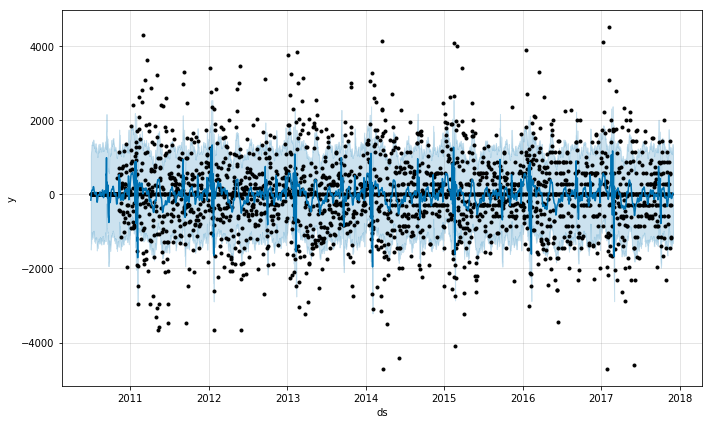

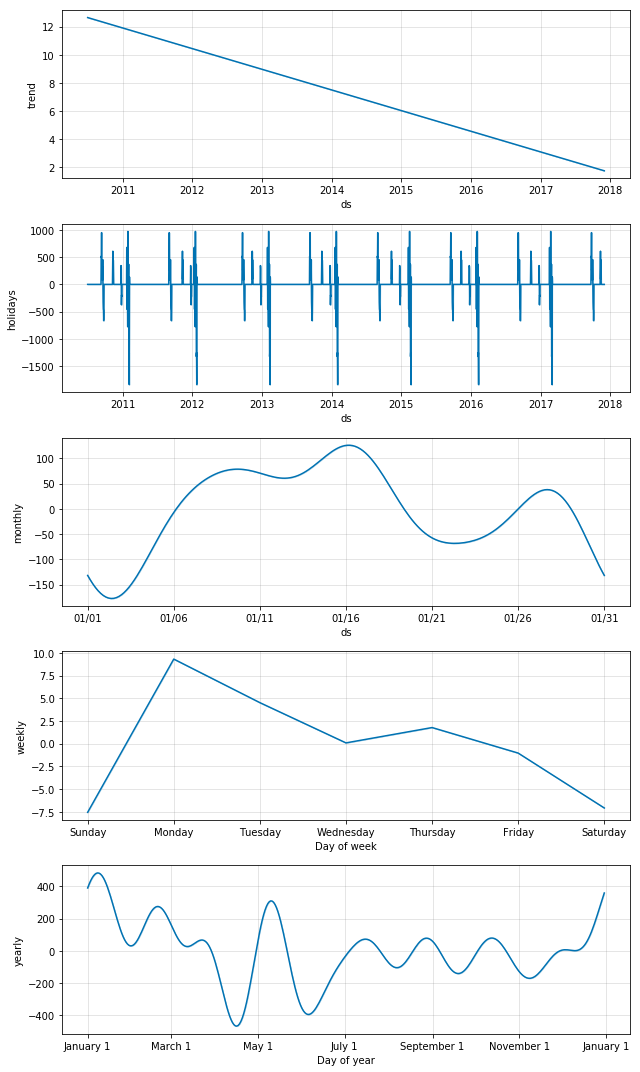

In [84]:
prpt_diff.plot('companycode_diff230054_230054_0')